In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix

In [19]:
# 🔹 Load the dataset
encoded_dataset = pd.read_csv('/home/jovyan/work/data/encoded_dataset.csv', index_col=0)

# Feature selection and feature scaling

In [4]:
# 🔹 Step 1: Encode Target Variable
original_dataset["target"] = original_dataset["target"].map({"heart_disease": 1, "normal": 0})

# 🔹 Step 2: Split Data (Stratified)
train_set, test_set = train_test_split(
    original_dataset,
    test_size=0.2,
    random_state=42,
    stratify=original_dataset['target']  # Key line for classification
)

# Define target column
target_column = "target"

# 🔹 Step 3: Separate Features & Target
X_train = train_set.drop(columns=[target_column])
y_train = train_set[target_column]
X_test = test_set.drop(columns=[target_column])
y_test = test_set[target_column]

# 🔹 Step 4: Feature Selection using SelectKBest (ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=10)  # Keep top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# 🔹 Step 5: Feature Scaling (Only Numerical Features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


===== MODEL PERFORMANCE METRICS =====

LogisticRegression Model:
ROC AUC: 0.824
Precision: 0.841
Recall: 0.821


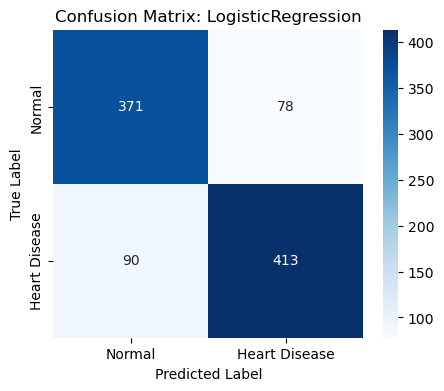


RandomForest Model:
ROC AUC: 0.906
Precision: 0.909
Recall: 0.915


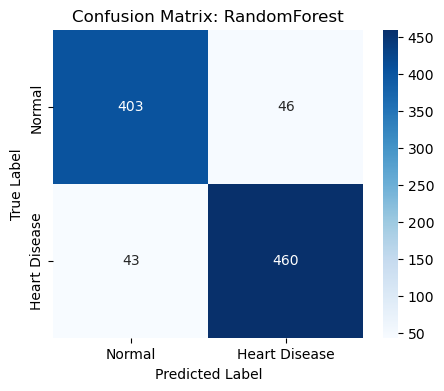


SVC Model:
ROC AUC: 0.851
Precision: 0.846
Recall: 0.883


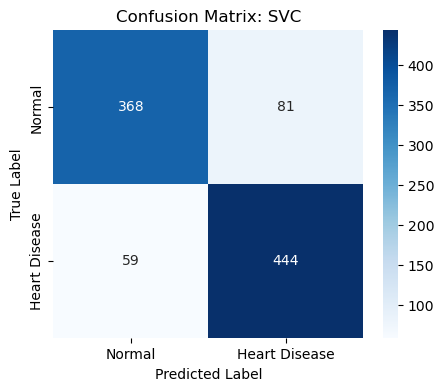

In [5]:
# 🔹 Step 6: Model Training & Evaluation
models = [
    ("LogisticRegression", LogisticRegression(random_state=42)),
    ("RandomForest", RandomForestClassifier(random_state=42)),
    ("SVC", SVC(probability=True, random_state=42))
]

print("===== MODEL PERFORMANCE METRICS =====")
for name, model in models:
    # Cross-validation predictions
    y_train_pred = cross_val_predict(model, X_train_scaled, y_train, cv=5)
    
    # Compute metrics
    roc_auc = roc_auc_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred)
    
    # Confusion matrix
    cm = confusion_matrix(y_train, y_train_pred)
    
    # Print results
    print(f"\n{name} Model:")
    print(f"ROC AUC: {roc_auc:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    
    # Visualize Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Heart Disease"], yticklabels=["Normal", "Heart Disease"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

,weight,height,resting.bp.s,cholesterol,fasting.blood.sugar,age,ST.slope,chest.pain.type,exercise.angina,max.heart.rate,oldpeak,resting.ecg,target,sex_encoded,physical_activity_High,physical_activity_Intermediate,physical_activity_Low
203,91.3,188.0,160,147,0,43,1.0,3.0,0.0,146.0,0.0,0.0,normal,1,0.0,1.0,0.0
163,79.5,157.0,110,208,0,50,1.0,2.0,0.0,160.0,0.0,0.0,normal,0,0.0,0.0,1.0
395,76.4,194.0,160,0,1,58,2.0,4.0,1.0,98.0,2.0,0.0,heart_disease,1,0.0,1.0,0.0
1074,70.3,199.0,160,246,0,67,2.0,2.0,1.0,120.0,0.0,0.0,heart_disease,1,0.0,0.0,1.0
788,49.3,196.0,140,254,0,70,2.0,3.0,0.0,146.0,2.0,2.0,heart_disease,1,1.0,0.0,0.0


,weight,height,resting.bp.s,cholesterol,fasting.blood.sugar,age,ST.slope,chest.pain.type,exercise.angina,max.heart.rate,oldpeak,resting.ecg,target,sex_encoded,physical_activity_High,physical_activity_Intermediate,physical_activity_Low
834,67.7,168.0,94,227,0,52,1.0,3.0,1.0,154.0,0.0,0.0,normal,1,0.0,1.0,0.0
546,48.6,165.0,132,272,0,49,1.0,4.0,0.0,139.0,0.2,1.0,normal,1,0.0,0.0,1.0
803,61.8,150.0,132,184,0,57,2.0,4.0,1.0,105.0,2.1,2.0,heart_disease,1,0.0,1.0,0.0
387,54.6,203.0,145,0,0,43,2.0,4.0,1.0,99.0,0.0,0.0,heart_disease,1,0.0,0.0,1.0
156,68.2,175.0,110,190,0,39,2.0,4.0,1.0,150.0,1.0,0.0,heart_disease,1,0.0,0.0,1.0


===== BASELINE CROSS-VALIDATION (ROC AUC) =====
LogisticRegression -> Mean ROC AUC: 0.900 (Std: 0.019)


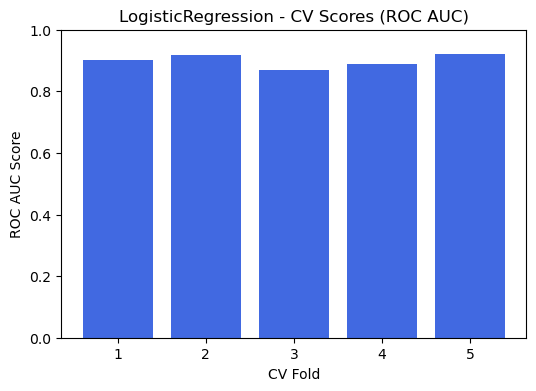

RandomForest -> Mean ROC AUC: 0.943 (Std: 0.016)


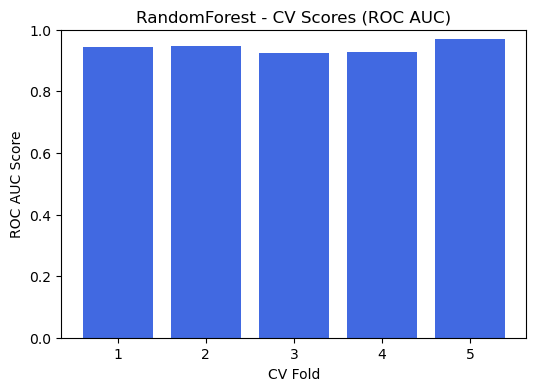

SVC -> Mean ROC AUC: 0.922 (Std: 0.022)


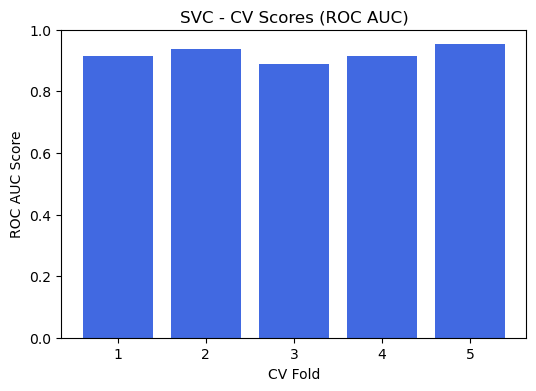

/opt/conda/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
160 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv


===== LOGISTIC REGRESSION RESULTS =====
Best params (LogisticRegression): {'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}
Best CV ROC AUC: 0.904

===== RANDOM FOREST RESULTS =====
Best params (RandomForest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV ROC AUC: 0.945

===== SVC RESULTS =====
Best params (SVC): {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV ROC AUC: 0.922

===== TEST SET EVALUATION =====

--- LogisticRegression ---
Test ROC AUC: 0.874


TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=[0 1] and y_pred=['heart_disease' 'normal']. Make sure that the predictions provided by the classifier coincides with the true labels.

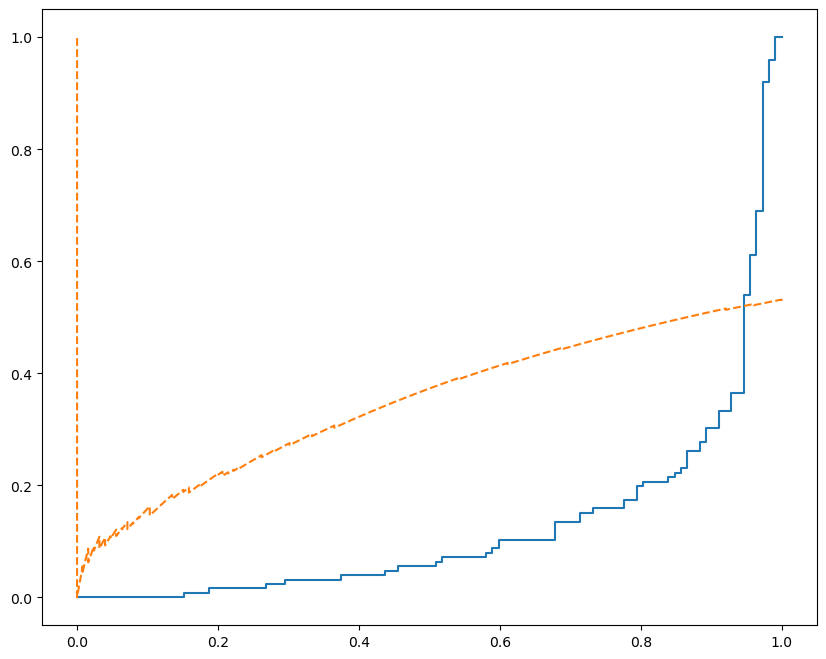

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, precision_score, recall_score, f1_score, precision_recall_curve, auc

# Step 2: Splitting the Dataset into Train and Test Sets (Stratified)
train_set, test_set = train_test_split(
    encoded_dataset,
    test_size=0.2,
    random_state=42,
    stratify=encoded_dataset['target']  # Key line for classification
)

# Display the final datasets
display(train_set.head())
display(test_set.head())

# Define your target column
target_column = "target"

# Training set: separate features and target
X_train = train_set.drop(columns=[target_column])
y_train = train_set[target_column]

# Test set: separate features and target
X_test = test_set.drop(columns=[target_column])
y_test = test_set[target_column]

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#########################################
# 3) BASELINE MODELS & CROSS-VALIDATION
#########################################

# Instantiate models
models = [
    ("LogisticRegression", LogisticRegression(random_state=42)),
    ("RandomForest", RandomForestClassifier(random_state=42)),
    ("SVC", SVC(probability=True, random_state=42))  # 'probability=True' needed for predict_proba
]

print("===== BASELINE CROSS-VALIDATION (ROC AUC) =====")
for name, model in models:
    cv_scores = cross_val_score(
        model,
        X_train_scaled,   # scaled data
        y_train,
        cv=5,
        scoring='roc_auc'
    )
    print(f"{name} -> Mean ROC AUC: {cv_scores.mean():.3f} (Std: {cv_scores.std():.3f})")
    
    # Visualize the CV scores per fold
    plt.figure(figsize=(6, 4))
    plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='royalblue')
    plt.xlabel('CV Fold')
    plt.ylabel('ROC AUC Score')
    plt.title(f'{name} - CV Scores (ROC AUC)')
    plt.ylim([0, 1])
    plt.xticks(range(1, len(cv_scores) + 1))
    plt.show()

#########################################
# 4) HYPERPARAMETER TUNING (GRID SEARCH)
#########################################

# --- Logistic Regression ---
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [100, 200, 300, 500]
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search_lr.fit(X_train_scaled, y_train)

print("\n===== LOGISTIC REGRESSION RESULTS =====")
print("Best params (LogisticRegression):", grid_search_lr.best_params_)
print(f"Best CV ROC AUC: {grid_search_lr.best_score_:.3f}")
best_lr = grid_search_lr.best_estimator_

# --- Random Forest ---
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search_rf.fit(X_train_scaled, y_train)

print("\n===== RANDOM FOREST RESULTS =====")
print("Best params (RandomForest):", grid_search_rf.best_params_)
print(f"Best CV ROC AUC: {grid_search_rf.best_score_:.3f}")
best_rf = grid_search_rf.best_estimator_

# --- SVC ---
param_grid_svc = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1.0]
}

grid_search_svc = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid_svc,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search_svc.fit(X_train_scaled, y_train)

print("\n===== SVC RESULTS =====")
print("Best params (SVC):", grid_search_svc.best_params_)
print(f"Best CV ROC AUC: {grid_search_svc.best_score_:.3f}")
best_svc = grid_search_svc.best_estimator_

#########################################
# 5) EVALUATE EACH BEST MODEL ON TEST SET
#########################################

models_best = [
    ("LogisticRegression", best_lr),
    ("RandomForest", best_rf),
    ("SVC", best_svc)
]

print("\n===== TEST SET EVALUATION =====")
# Convert categorical target to binary labels
y_test_binary = y_test.map({'heart_disease': 1, 'normal': 0})

# Calculate ROC curve and AUC for each model
plt.figure(figsize=(10, 8))
for name, model in models_best:
    # Probability of the positive class (for ROC AUC)
    y_proba_test = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_binary, y_proba_test)  # Use y_test_binary here

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

    # Other evaluation metrics as needed
    precision, recall, _ = precision_recall_curve(y_test_binary, y_proba_test)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, linestyle='--', label=f"{name} (PR AUC={pr_auc:.3f})")

    print(f"\n--- {name} ---")
    print(f"Test ROC AUC: {roc_auc:.3f}")

    # Get classification metrics at the default threshold (0.5)
    y_pred_test = model.predict(X_test_scaled)
    print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_test))
    print("Classification Report:\n", classification_report(y_test_binary, y_pred_test))


/tmp/ipykernel_9593/2488834010.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


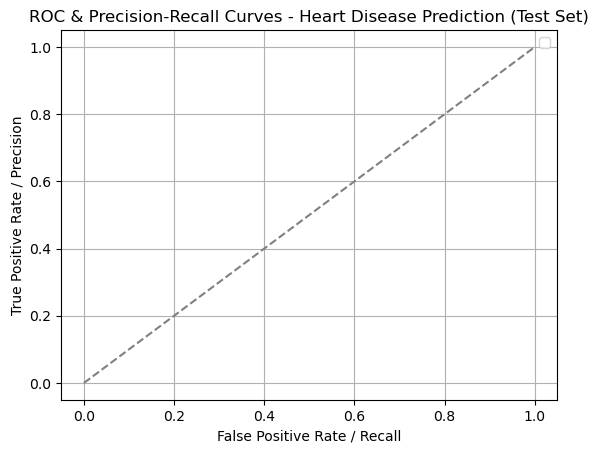

In [21]:
# Finalize the ROC plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate / Recall")
plt.ylabel("True Positive Rate / Precision")
plt.title("ROC & Precision-Recall Curves - Heart Disease Prediction (Test Set)")
plt.legend()
plt.grid(True)
plt.show()